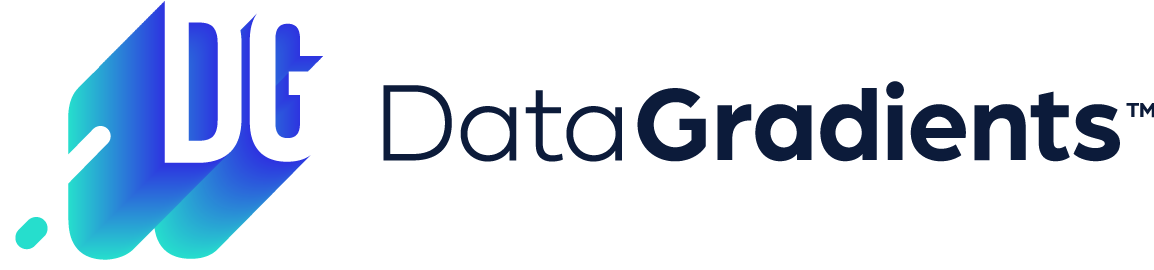

Welcome to this tutorial notebook on [DataGradients](https://github.com/Deci-AI/data-gradients), an exciting open-source python library designed for computer vision dataset analysis. If you're involved in computer vision tasks such as image classification, object detection, or semantic segmentation, DataGradients is the perfect tool to assist you in understanding and analyzing your datasets. With its powerful feature extraction capabilities and user-friendly reporting, DataGradients simplifies the process of gaining insights from your data. In this tutorial, we will explore some of the features and functionalities of DataGradients, providing you with a step-by-step guide to leverage this tool for comprehensive data analysis in your computer vision projects.

 Let's dive in and unlock the hidden potential of your datasets with DataGradients!

## Step 0: Installation

In [ ]:
! pip install data-gradients &> /dev/null

## Step 1: Download a Portion of the BDD Dataset

To demonstrate the analysis capabilities of DataGradients, we will work with a portion of the [BDD dataset](https://bdd-data.berkeley.edu/), a popular computer vision dataset for autonomous driving

In [ ]:
import os

BDD_DATASET_DOWNLOAD_PATH="/home/data"

bdd_dataset_dir_path = BDD_DATASET_DOWNLOAD_PATH + os.path.sep + 'bdd_example'

if os.path.isdir(bdd_dataset_dir_path):
    print('bdd dataset already downloaded...')
else:
    print('Downloading and extracting bdd dataset to: ' + BDD_DATASET_DOWNLOAD_PATH)
    ! mkdir $BDD_DATASET_DOWNLOAD_PATH
    %cd $BDD_DATASET_DOWNLOAD_PATH
    ! wget https://deci-pretrained-models.s3.amazonaws.com/bdd_example.zip
    ! unzip --qq bdd_example.zip

/home/data
--2023-07-12 12:52:14--  https://deci-pretrained-models.s3.amazonaws.com/bdd_example.zip
Resolving deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)... 3.5.27.22, 52.217.231.81, 52.217.39.212, ...
Connecting to deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)|3.5.27.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2841277 (2.7M) [application/zip]
Saving to: ‘bdd_example.zip’

bdd_example.zip     100%[===================>]   2.71M  11.3MB/s    in 0.2s    

2023-07-12 12:52:15 (11.3 MB/s) - ‘bdd_example.zip’ saved [2841277/2841277]



## Step 2: Instantiating Dataloaders

Once we have our dataset subset ready, we need to create dataloaders to efficiently load and process the data.
We will later pass these train and validation data loader objects for analysis.

In [ ]:
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor

from data_gradients.datasets.bdd_dataset import BDDDataset

    # Create torch DataSet
train_dataset = BDDDataset(
        data_folder="/home/data/bdd_example",
        split="train",
        transform=Compose([ToTensor()]),
        target_transform=Compose([ToTensor()]),
    )
val_dataset = BDDDataset(
        data_folder="/home/data/bdd_example",
        split="val",
        transform=Compose([ToTensor()]),
        target_transform=Compose([ToTensor()]),
    )

    # Create torch DataLoader
train_loader = DataLoader(train_dataset, batch_size=8)
val_loader = DataLoader(val_dataset, batch_size=8)

## Step 3: Perform Analysis

Now that we have our dataset loaded and ready, let's dive into performing data analysis using DataGradients. In this section, we will demonstrate how to use the SegmentationAnalysisManager class from DataGradients to analyze our dataset subset.

To start, we instantiate the SegmentationAnalysisManager by providing the necessary inputs:

- report_title: A title for the analysis report.

- train_data and val_data: The dataloaders for the training and validation sets, respectively.

- class_names: The list of class names present in the dataset.

- class_names_to_use: The subset of class names we want to analyze.

Additionally, there are some optional parameters that we can adjust based on our specific needs:

- images_extractor and labels_extractor: Custom functions to extract images and labels from the dataset if needed.
- threshold_soft_labels: A threshold value for soft labels, converting them to hard labels.
- batches_early_stop: The number of batches to analyze before early stopping.

And a few more, which you can read about in the [SegmentationAnalysisManager class docs #ADD LINK]()

Once we have instantiated the SegmentationAnalysisManager, we can run the analysis by calling the run() method.
 This will trigger the feature extraction, visualization, and interpretation processes provided by DataGradients.

The process is expected to take around 30 second for BDD dataset, and may take more then 20 minutes in case of a large dataset.


In [ ]:
from data_gradients.managers.segmentation_manager import SegmentationAnalysisManager

import matplotlib
matplotlib.use('Agg') # This line is only for Colab

da = SegmentationAnalysisManager(
        report_title="BDD Subset Example",
        train_data=train_loader,
        val_data=val_loader,
        class_names=BDDDataset.CLASS_NAMES,
        class_names_to_use=BDDDataset.CLASS_NAMES[:-1],
        # Optionals
        images_extractor=None,
        labels_extractor=None,
        threshold_soft_labels=0.5,
        batches_early_stop=75,
    )

da.run()

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 72.7MB/s]


  - Executing analysis with: 
  - batches_early_stop: 75 
  - len(train_data): 3 
  - len(val_data): 2 
  - log directory: /content/logs/BDD_Subset_Example 
  - Archive directory: /content/logs/BDD_Subset_Example/archive_20230712-125302 
  - feature extractor list: {'Image Features': [SummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Segmentation Features': [SegmentationSampleVisualization, SegmentationClassHeatmap, SegmentationClassFrequency, SegmentationClassesPerImageCount, SegmentationComponentsPerImageCount, SegmentationBoundingBoxResolution, SegmentationBoundingBoxArea, SegmentationComponentsConvexity, SegmentationComponentsErosion]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚══════════

Summarizing... : 100%|██████████| 2/2 [00:14<00:00,  7.23s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...
****************************************************************************************************
We have finished evaluating your dataset!

The cache of your DataConfig object can be found in:
    - /root/.cache/DataGradients/BDD_Subset_Example.json

The results can be seen in:
    - /content/logs/BDD_Subset_Example
    - /content/logs/BDD_Subset_Example/archive_20230712-125302


## Step 4: View Full PDF Report

Notice that in the previous section prompt, we have been notified that `log directory: /content/logs/BDD_Subset_Example` (note that this can also be controlled when passing `log_dir` argument explicitly to the SegmentationAnalysisManager constructor).

In DataGradients, this log directory also holds the full PDF report, which can be used to view the analysis offline.
The PDF report also includes a comprehensive summary in its first page, and valuable interpretations of common cases for the feature extractors that were used.

In [ ]:
#@title
# installs just to show the PDF in colab
! apt-get install poppler-utils &> /dev/null
! pip install pdf2image &> /dev/null

In [ ]:



#@title
import os
import tempfile
from pdf2image import convert_from_path
from PIL import Image


def convert_pdf(file_path, output_path):
    # save temp image files in temp dir, delete them after we are finished
    with tempfile.TemporaryDirectory() as temp_dir:

        # convert pdf to multiple image
        images = convert_from_path(file_path, output_folder=temp_dir)

        # save images to temporary directory
        temp_images = []
        for i in range(len(images)):
            image_path = f'{temp_dir}/{i}.jpg'
            images[i].save(image_path, 'JPEG')
            temp_images.append(image_path)

        # read images into pillow.Image
        imgs = list(map(Image.open, temp_images))

    # find minimum width of images
    min_img_width = min(i.width for i in imgs)

    # find total height of all images
    total_height = 0
    for i, img in enumerate(imgs):
        total_height += imgs[i].height

    # create new image object with width and total height
    merged_image = Image.new(imgs[0].mode, (min_img_width, total_height))

    # paste images together one by one
    y = 0
    for img in imgs:
        merged_image.paste(img, (0, y))
        y += img.height

    # save merged image
    merged_image.save(output_path)

    return output_path

pdf_path = "/content/logs/BDD_Subset_Example/Report.pdf"
png_path = pdf_path.replace(".pdf", ".png")
convert_pdf(pdf_path, png_path)


'/content/logs/BDD_Subset_Example/Report.png'

## Preview of the PDF report

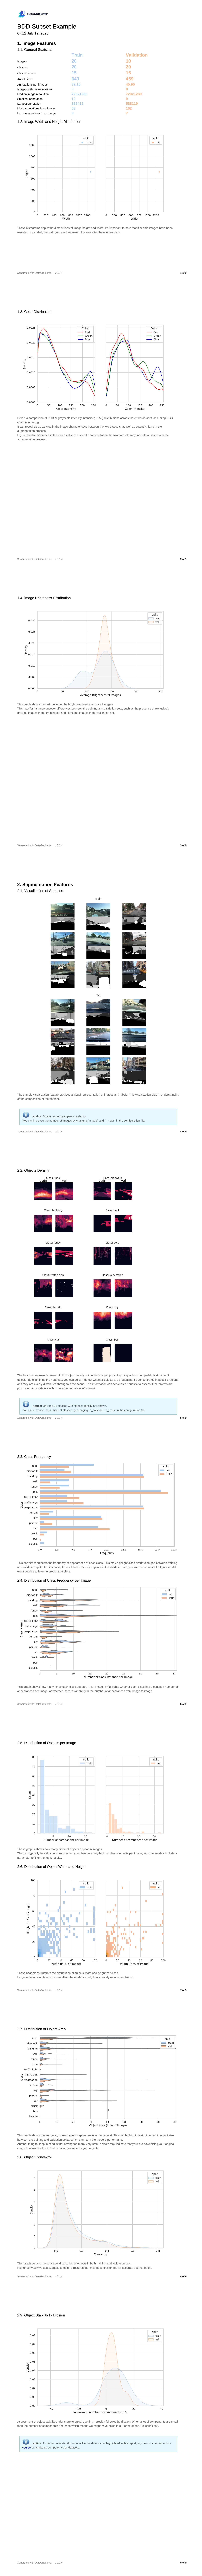

In [ ]:
#@title
from IPython.display import Image
Image(png_path , width=800)
